# Importing Libraries

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import Lasso,Ridge
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import warnings

# Loading Dataset 

In [2]:
df=pd.read_csv("Maintenance_Record.csv" ,  encoding = "ISO-8859-1")

In [3]:
df.head()

,Component_ID,Component Type,Component Age,Maintenance Type,Temperature,Pressure,Vibration,Voltage,Current,Failure History,Failure Cause,Humidity,Rainfall,Mean Time between Failure,Mean Time To Repair
0,1,Locomotive,5 years,Preventive,28.7,102.4,0.15,132.8,27.1,2,Wear and Tear,68%,0.2 mm,6500 hours,4 hours
1,2,Track,10 years,Corrective,25.3,99.9,0.12,128.6,23.8,3,Signal Failure,72%,0.5 mm,3800 hours,8 hours
2,3,Signaling,7 years,Preventive,26.8,101.2,0.14,130.5,25.6,1,Electrical Fault,69%,0.1 mm,5100 hours,6 hours
3,4,Locomotive,3 years,Corrective,31.2,102.9,0.16,134.2,28.9,4,Track Defect,67%,0.3 mm,7800 hours,3 hours
4,5,Track,8 years,Preventive,24.9,99.7,0.11,127.4,23.2,2,Wear and Tear,70%,0.4 mm,4300 hours,7 hours


In [4]:
df.shape

(50, 15)

In [5]:
# data dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Component_ID               50 non-null     int64  
 1   Component Type             50 non-null     object 
 2   Component Age              50 non-null     object 
 3   Maintenance Type           50 non-null     object 
 4   Temperature                50 non-null     float64
 5   Pressure                   50 non-null     float64
 6   Vibration                  50 non-null     float64
 7   Voltage                    50 non-null     float64
 8   Current                    50 non-null     float64
 9   Failure History            50 non-null     int64  
 10  Failure Cause              50 non-null     object 
 11  Humidity                   50 non-null     object 
 12  Rainfall                   50 non-null     object 
 13  Mean Time between Failure  50 non-null     object 
 

In [6]:
# Statistical information
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Component_ID,50.0,NaN,NaN,NaN,25.5,14.57738,1.0,13.25,25.5,37.75,50.0
Component Type,50,3,Signaling,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Component Age,50,9,5 years,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Maintenance Type,50,2,Preventive,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,50.0,NaN,NaN,NaN,28.108,2.035585,24.8,26.625,28.15,29.975,32.1
Pressure,50.0,NaN,NaN,NaN,101.426,1.252069,99.2,100.325,101.5,102.5,104.3
Vibration,50.0,NaN,NaN,NaN,0.135,0.017642,0.11,0.12,0.13,0.15,0.17
Voltage,50.0,NaN,NaN,NaN,131.336,2.175819,127.4,129.8,131.05,133.475,135.2
Current,50.0,NaN,NaN,NaN,26.262,1.913421,23.2,24.7,26.2,28.175,29.6
Failure History,50.0,NaN,NaN,NaN,1.96,0.902604,1.0,1.0,2.0,3.0,4.0


# Data Preprocessing

In [7]:
# Checking null values of data 
df.isna().sum()

Component_ID                 0
Component Type               0
Component Age                0
Maintenance Type             0
Temperature                  0
Pressure                     0
Vibration                    0
Voltage                      0
Current                      0
Failure History              0
Failure Cause                0
Humidity                     0
Rainfall                     0
Mean Time between Failure    0
Mean Time To Repair          0
dtype: int64

In [12]:
# Checking duplicate
df.duplicated().sum()

0

# Exploratory data analysis

In [15]:
# convert time columns to integer

columns_to_extract = ['Mean Time between Failure', 'Mean Time To Repair','Component Age','Humidity','Rainfall']

for column in columns_to_extract:
    df[column] = df[column].apply(lambda x: int(''.join(filter(str.isdigit, str(x)))))



In [16]:
# Divide Data in categorical and numerical features
numeric_features= df.select_dtypes(exclude='object')
categorical_features=df.select_dtypes(include='object')

In [17]:
numeric_features.head()

,Component_ID,Component Age,Temperature,Pressure,Vibration,Voltage,Current,Failure History,Humidity,Rainfall,Mean Time between Failure,Mean Time To Repair
0,1,5,28.7,102.4,0.15,132.8,27.1,2,68,2,6500,4
1,2,10,25.3,99.9,0.12,128.6,23.8,3,72,5,3800,8
2,3,7,26.8,101.2,0.14,130.5,25.6,1,69,1,5100,6
3,4,3,31.2,102.9,0.16,134.2,28.9,4,67,3,7800,3
4,5,8,24.9,99.7,0.11,127.4,23.2,2,70,4,4300,7


In [18]:
categorical_features.head()

,Component Type,Maintenance Type,Failure Cause
0,Locomotive,Preventive,Wear and Tear
1,Track,Corrective,Signal Failure
2,Signaling,Preventive,Electrical Fault
3,Locomotive,Corrective,Track Defect
4,Track,Preventive,Wear and Tear


In [19]:
# checking categorical column value count
for i in categorical_features.columns:
    print("\n ")
    print('column name  : ', i)
    print(df[i].value_counts())


 
column name  :  Component Type
Signaling     18
Locomotive    17
Track         15
Name: Component Type, dtype: int64

 
column name  :  Maintenance Type
Preventive    30
Corrective    20
Name: Maintenance Type, dtype: int64

 
column name  :  Failure Cause
Track Defect        15
Electrical Fault    10
Weather Impact       9
Wear and Tear        8
Signal Failure       8
Name: Failure Cause, dtype: int64


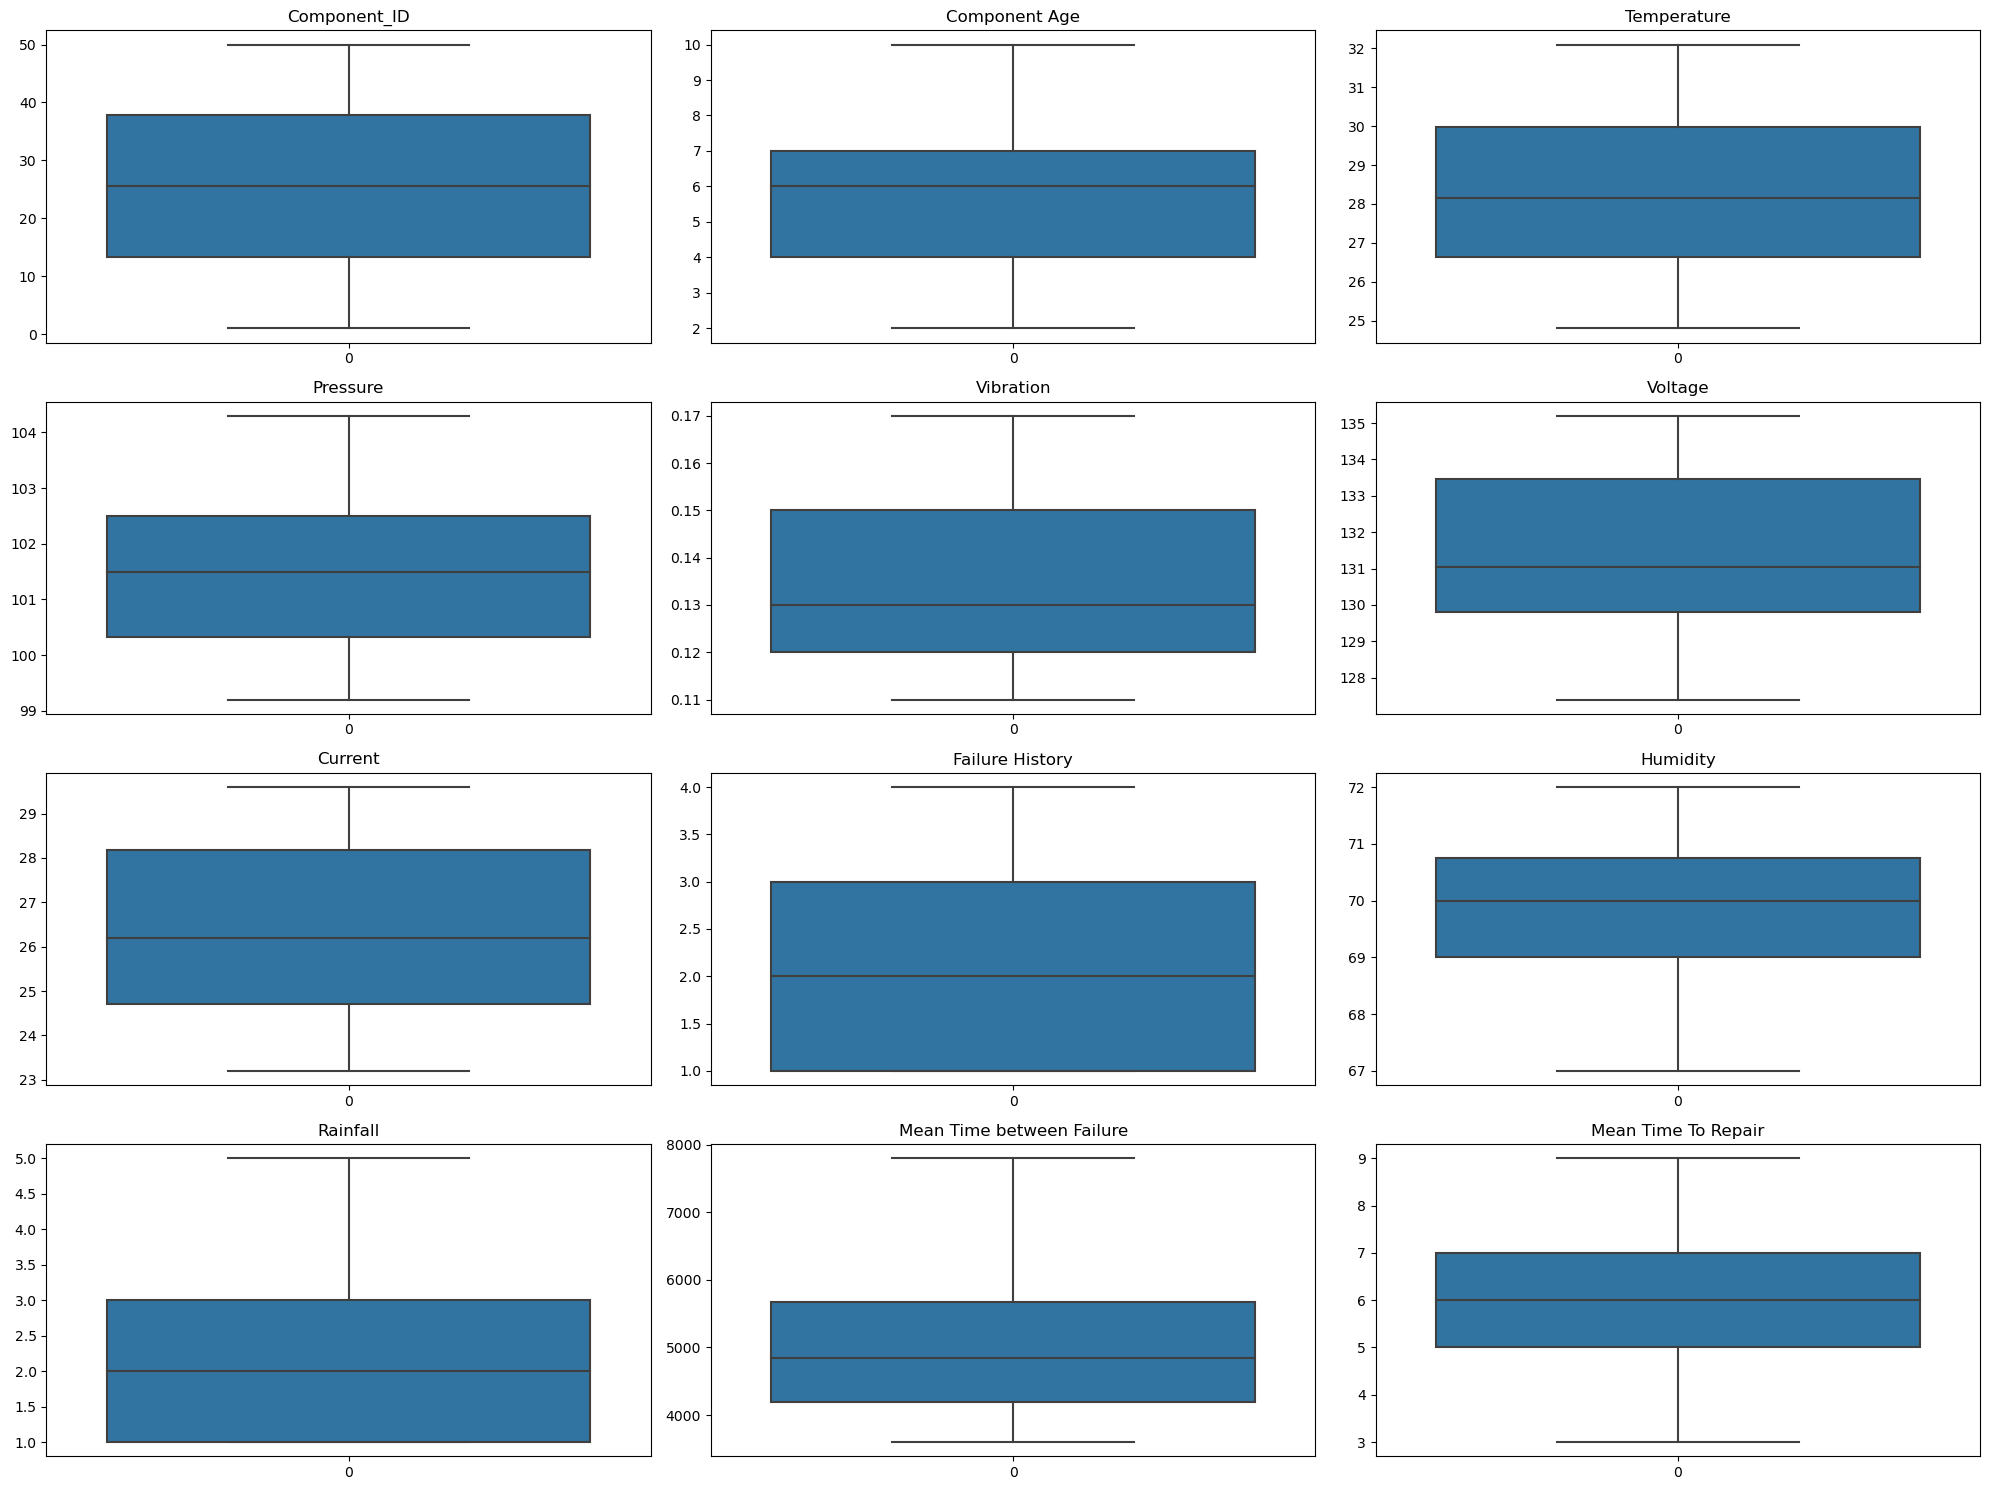

In [23]:
# checking Outliers with seaborn boxplot
n = 1
plt.figure(figsize=(20,15))

for i in numeric_features.columns:
    plt.subplot(4,3,n)
    n=n+1
    sns.boxplot(df[i])
    plt.title(i)
    plt.tight_layout()

C:\Users\Owner\AppData\Local\Temp\ipykernel_23848\1235453632.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
C:\Users\Owner\AppData\Local\Temp\ipykernel_23848\1235453632.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
C:\Users\Owner\AppData\Local\Temp\ipykernel_23848\123545

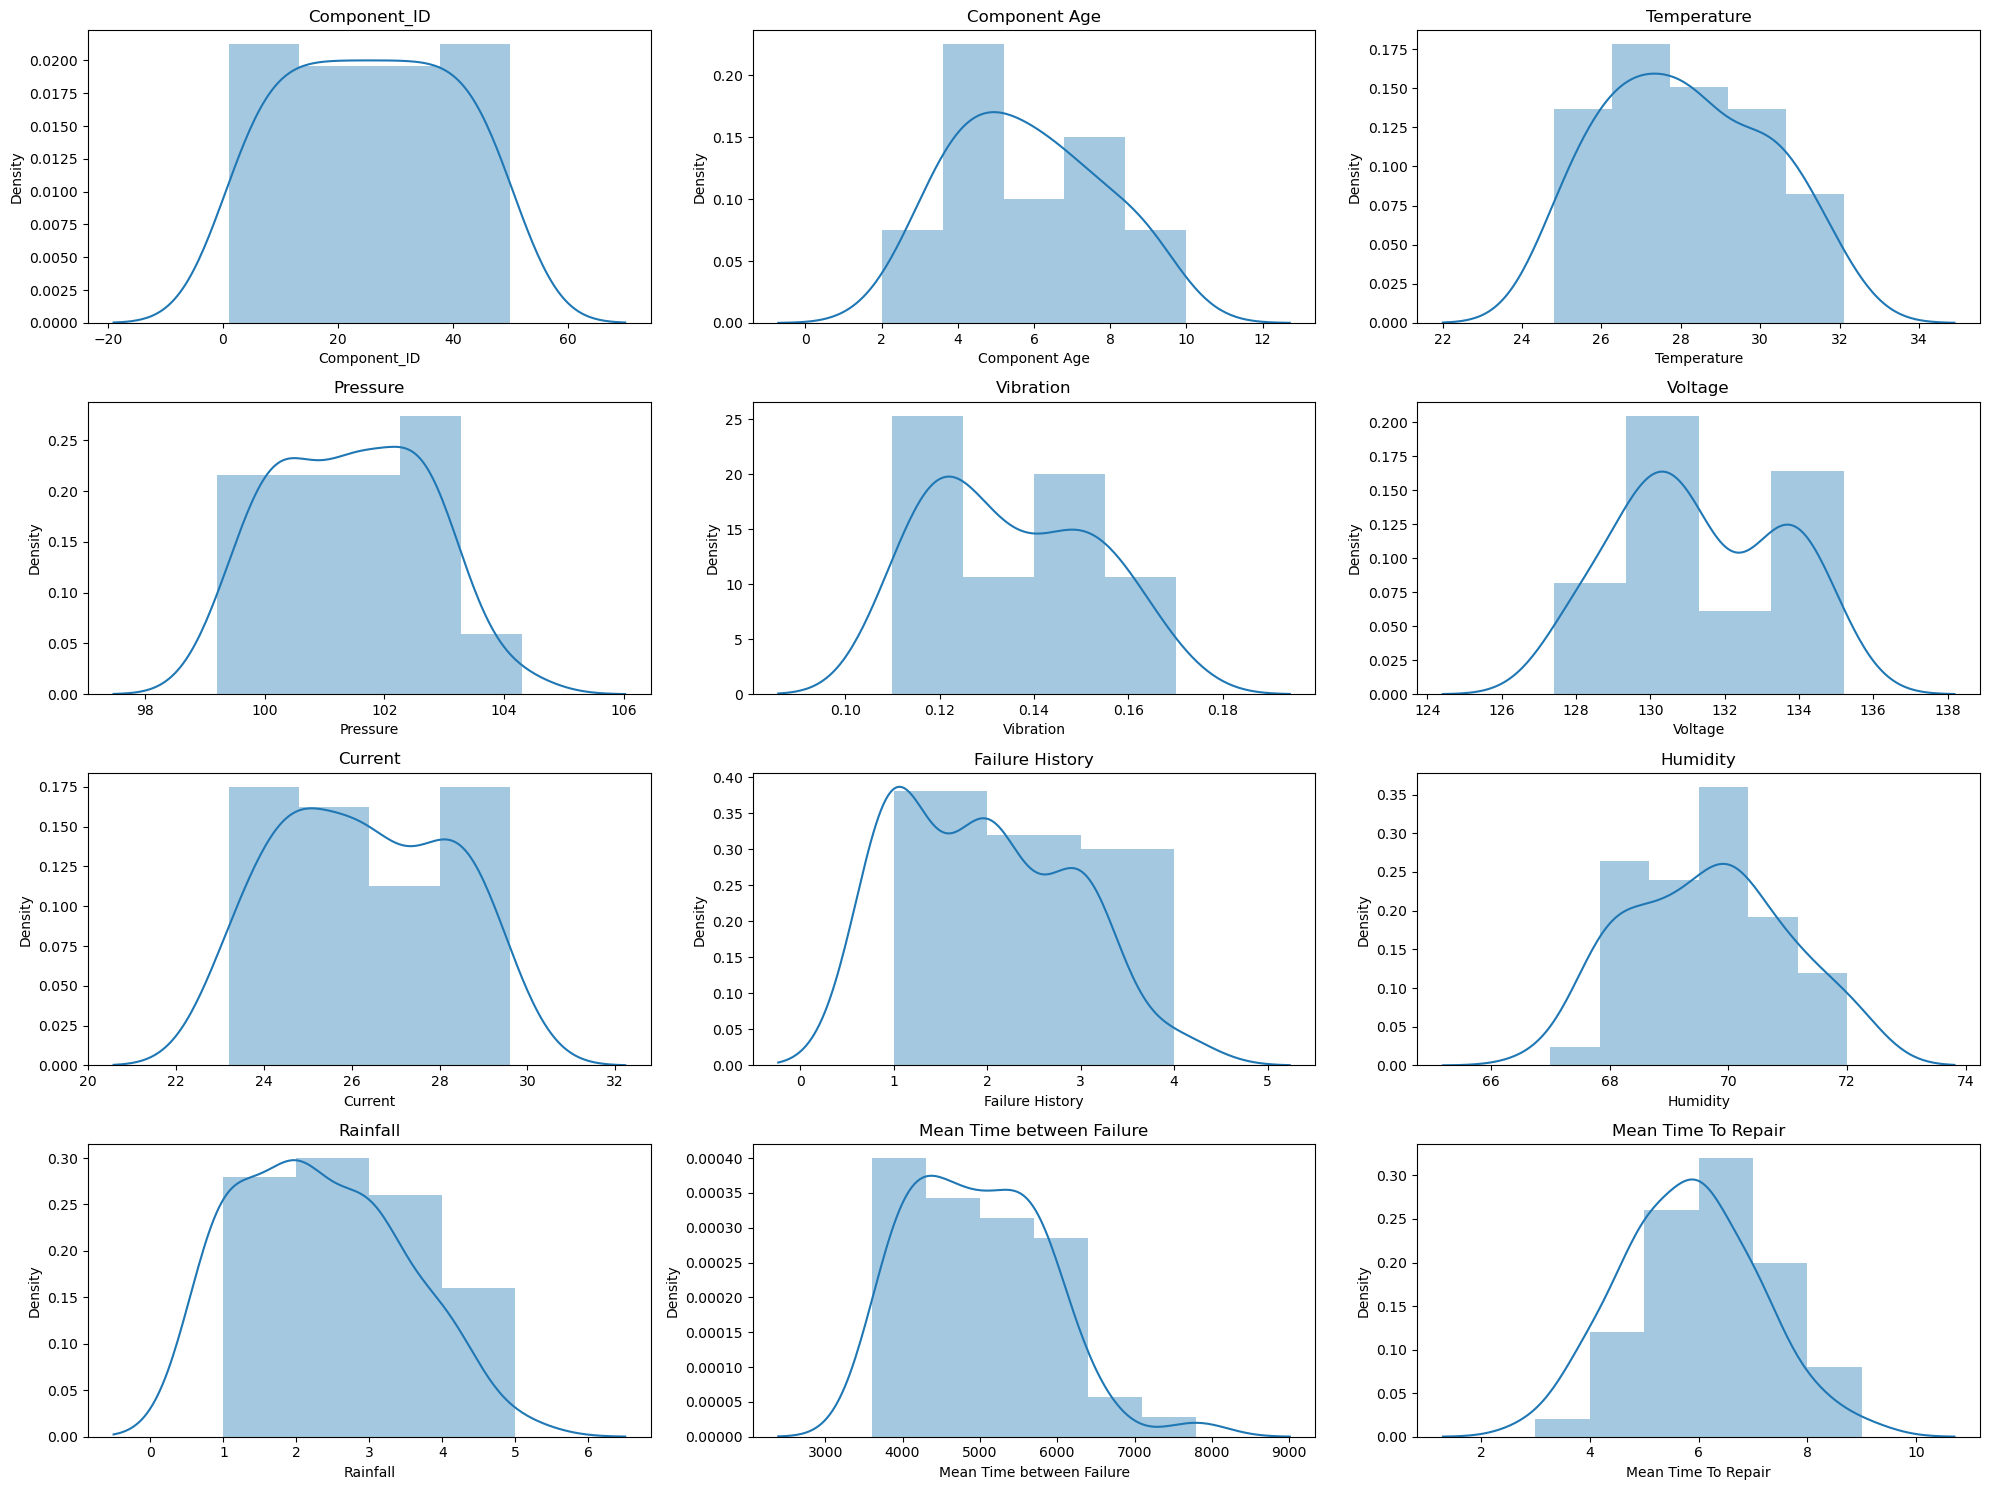

In [30]:
# Distrubution of Data
n=1
plt.figure(figsize=(20,15))
for i in numeric_features.columns:
    plt.subplot(4,3,n)
    n=n+1
    sns.distplot(df[i])
    plt.title(i)
    plt.tight_layout()


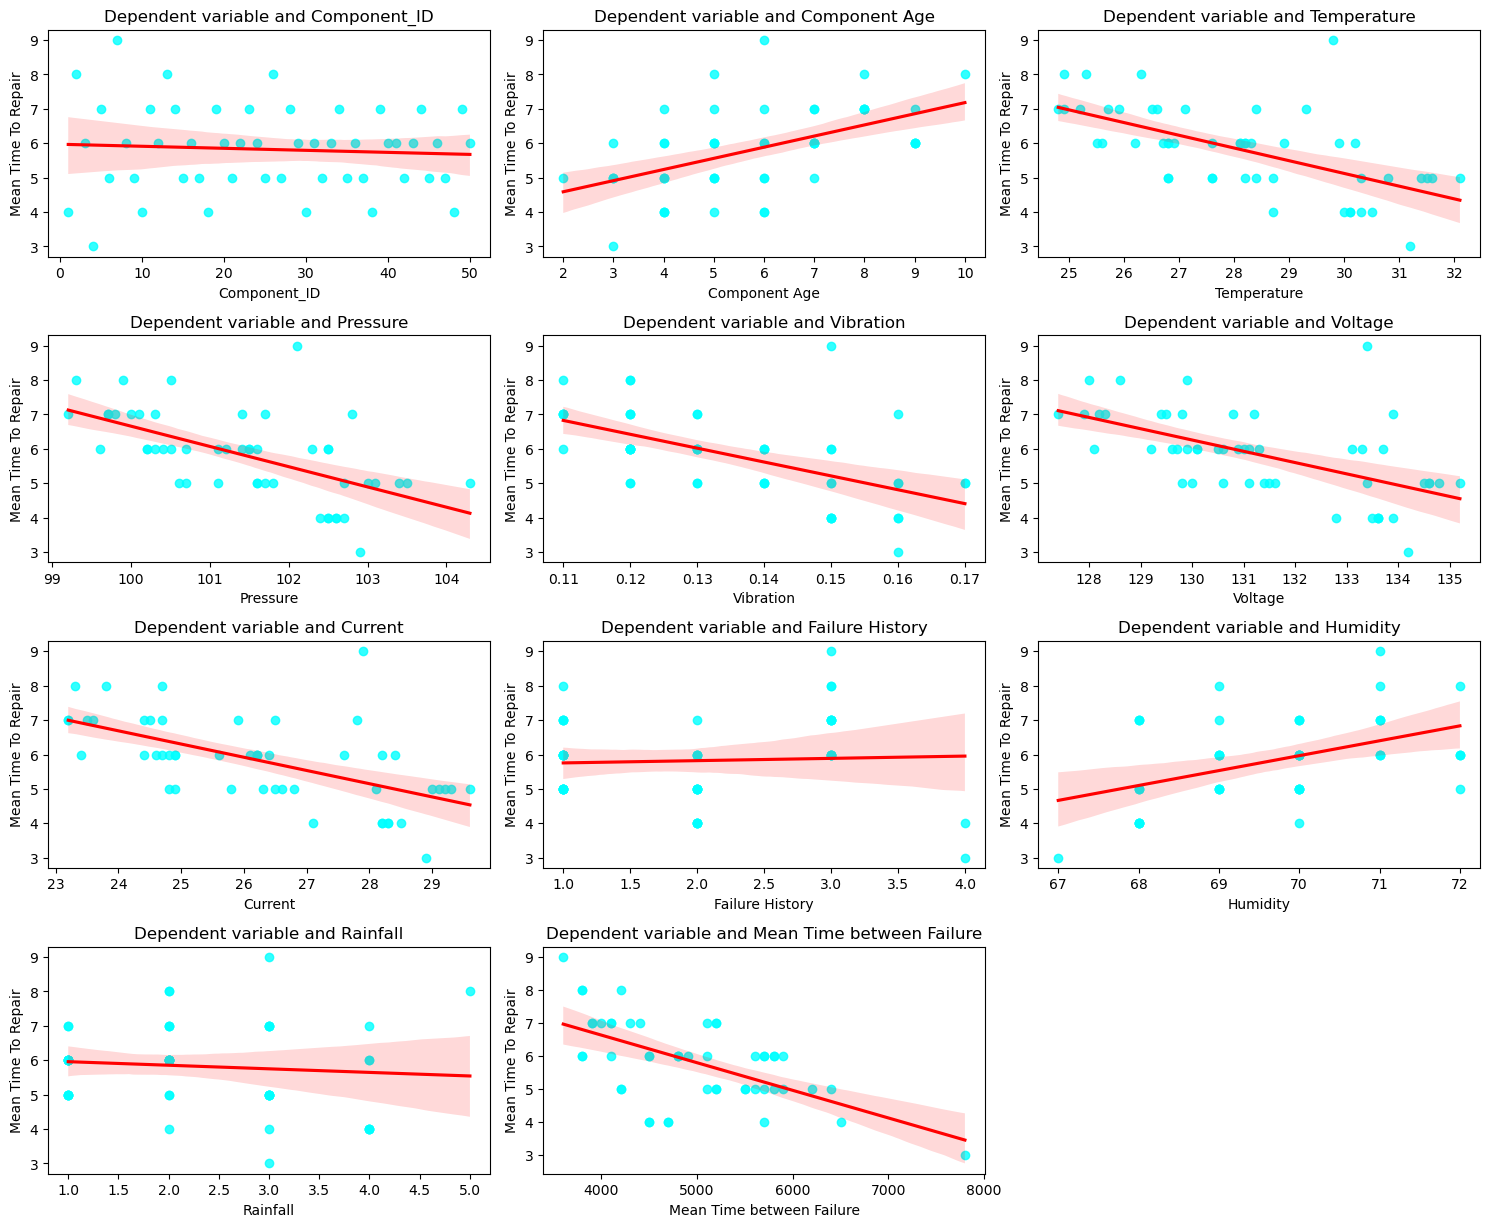

In [34]:
n = 1
plt.figure(figsize=(15, 15))

for i in numeric_features.columns:
    if i == 'Mean Time To Repair':
        pass
    else:
        plt.subplot(5, 3, n)
        n += 1
        sns.regplot(x=i, y='Mean Time To Repair', data=df, scatter_kws={"color": "cyan"}, line_kws={"color": "red"})
        plt.title(f'Dependent variable and {i}')
        plt.tight_layout()

plt.show()


In [35]:
# Correlation with Rented Bike Count
df.corr()['Mean Time To Repair']

C:\Users\Owner\AppData\Local\Temp\ipykernel_23848\1176540479.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Mean Time To Repair']


Component_ID                -0.069418
Component Age                0.517025
Temperature                 -0.606468
Pressure                    -0.593550
Vibration                   -0.573604
Voltage                     -0.575306
Current                     -0.592853
Failure History              0.048126
Humidity                     0.460891
Rainfall                    -0.091863
Mean Time between Failure   -0.595124
Mean Time To Repair          1.000000
Name: Mean Time To Repair, dtype: float64

C:\Users\Owner\AppData\Local\Temp\ipykernel_23848\875116626.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(abs(df.corr()), cmap='coolwarm', annot=True)


<Axes: >

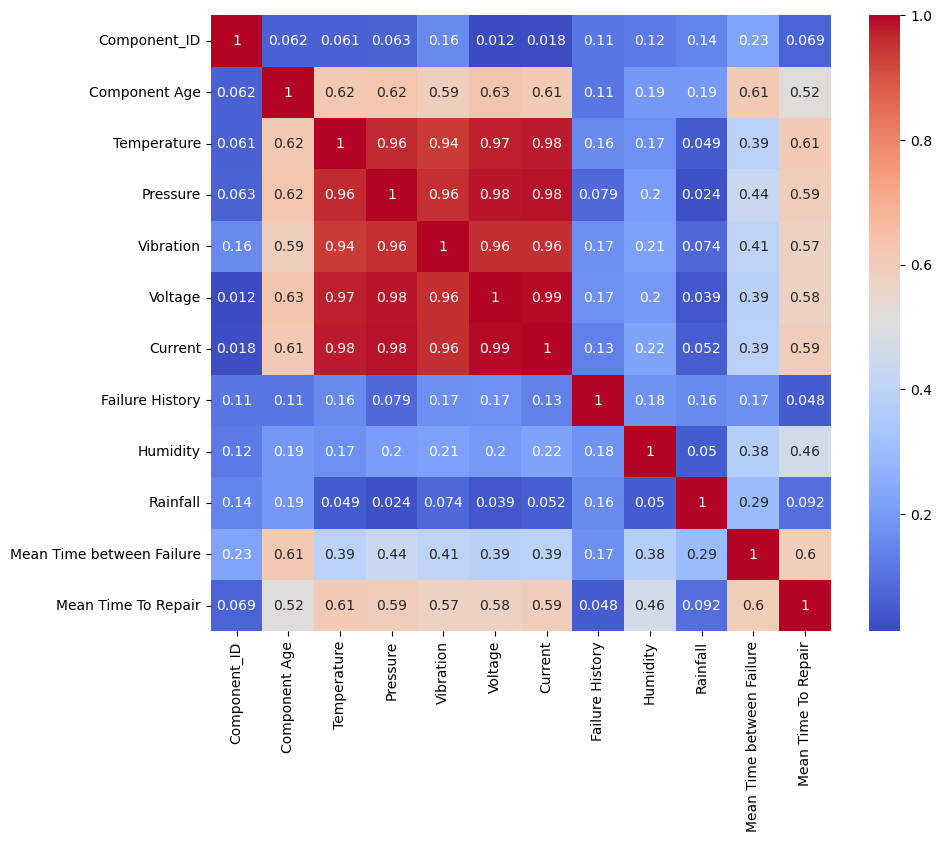

In [36]:
# using seaborn heatmap for ploting correlation graph 
plt.figure(figsize=(10,8))
sns.heatmap(abs(df.corr()), cmap='coolwarm', annot=True)

# Training Data

In [48]:
X = df[['Component_ID','Component Age','Temperature','Pressure','Vibration','Voltage','Current','Failure History','Humidity','Rainfall','Mean Time between Failure' ]]

y =df['Mean Time To Repair']

# Train test split our data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25,random_state=42)

In [49]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((37, 11), (13, 11), (37,), (13,))

In [50]:
def score_metrics(actual,predicted):
    mae = mean_absolute_error(actual**2,predicted**2)
    print('mean absolute error is  :',mae)
    mse = mean_squared_error(actual**2,predicted**2)
    print('mean squared error is  :',mse)
    print('Root mean squared error is  :',np.sqrt(mse))
    print("R2 score is  :",r2_score(actual**2,predicted**2))

In [51]:
# Fitting the model
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [52]:
regression.score(X_train,y_train)

0.6341630882684677

In [53]:
#predicting 
reg_pred = regression.predict(X_test)
score_metrics(y_test,reg_pred)

mean absolute error is  : 8.198321228209208
mean squared error is  : 92.58237593318572
Root mean squared error is  : 9.621973598653538
R2 score is  : 0.5772608469494114
